In [36]:
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import netCDF4
import numpy as np
import os
import pandas as pd

In [37]:
fields_file = '/Users/afox/Jedi/whj/build/wrf_hydro_nwm_jedi/test/Data/wrf_hydro_nwm_files/offline_restart.nc'
init_file = '/Users/afox/Jedi/whj/ufs-land_C96_da_init_fields_1hr.nc'

In [38]:
field_name = "SNEQV"

In [39]:
model_layer = None

In [40]:
# Open the file
print('\nOpening ', init_file, 'for reading')
ncfile = netCDF4.Dataset(init_file, mode='r')


Opening  /Users/afox/Jedi/whj/ufs-land_C96_da_init_fields_1hr.nc for reading


In [41]:
lons = ncfile.variables["longitude"][:]
lats = ncfile.variables["latitude"][:]

lonsmax = np.max(lons)
lonsmin = np.min(lons)
latsmax = np.max(lats)
latsmin = np.min(lats)
lonsrange = lonsmax-lonsmin
latsrange = latsmax-latsmin

lonsmax, lonsmin, latsmax, latsmin, latsrange, lonsrange

(279.858, 260.51947, 49.965862, 30.01692, 19.948942, 19.338531)

In [42]:
yi = np.linspace(30,50,20)
xi = np.linspace(260,280,20)

In [43]:
# Open the file
print('\nOpening ', fields_file, 'for reading')
ncfile = netCDF4.Dataset(fields_file, mode='r')


Opening  /Users/afox/Jedi/whj/build/wrf_hydro_nwm_jedi/test/Data/wrf_hydro_nwm_files/offline_restart.nc for reading


In [44]:
units = "mm"

In [45]:
# Zero out array to fill with field
field = np.zeros((449, 1))

field[:,:] = ncfile.variables[field_name][:,:]

In [46]:
# Interpolate onto grid

import matplotlib.tri as tri

y = lats
x = lons
z = field.reshape(449)

# from scipy.interpolate import griddata
# zi = griddata((x, y), z, (xi[None, :], yi[:, None]), method='linear')

triang = tri.Triangulation(x, y)
interpolator = tri.LinearTriInterpolator(triang, z)
Xi, Yi = np.meshgrid(xi, yi)
zi = interpolator(Xi, Yi)


In [47]:
# Check if field has positve and negative values
# ----------------------------------------------
if np.min(zi) < 0:
      cmax = np.max(np.abs(zi))
      cmin = -cmax
      cmap = 'RdBu'
else:
      cmax = np.max(zi)
      cmin = np.min(zi)
      cmap = 'nipy_spectral'

levels = np.linspace(cmin,cmax,20)

cmax, cmin

cmap = 'RdBu'


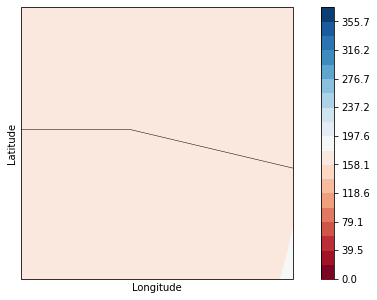

In [48]:
# Create two dimensional contour plot of field

# Set the projection
projection = ccrs.PlateCarree()

    # Create figure to hold plot
fig = plt.figure(figsize=(10, 5))

    # Just one subplot for now
ax = fig.add_subplot(1, 1, 1, projection=projection)

    # Contour the field
im = ax.contourf(xi, yi, zi,
                    transform=projection,
                     cmap=cmap,
                     levels=levels)

# Add coast lines to the plot
ax.coastlines()
#ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.STATES,linewidth=0.5)

# Add labels to the plot
ax.set_xticks(np.linspace(255-360,285-360, 5), crs=projection)
ax.set_yticks(np.linspace(25, 55, 5), crs=projection)

ax.set_extent([272.49-360,272.51-360, 48.79, 48.81], crs=projection)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
#ax.set_title(title)
#ax.set_global()

# Add a colorbar for the filled contour.
fig.colorbar(im)

# Show the figure
#thisoutfile = "World_"+outfile
#print(" Saving figure as", thisoutfile, "\n")
#plt.savefig(thisoutfile, facecolor='w', dpi = 200)

In [49]:
zi.size, xi.size, yi.size

(400, 20, 20)

In [51]:
xi, yi, 16, 19

(array([260.        , 261.05263158, 262.10526316, 263.15789474,
        264.21052632, 265.26315789, 266.31578947, 267.36842105,
        268.42105263, 269.47368421, 270.52631579, 271.57894737,
        272.63157895, 273.68421053, 274.73684211, 275.78947368,
        276.84210526, 277.89473684, 278.94736842, 280.        ]),
 array([30.        , 31.05263158, 32.10526316, 33.15789474, 34.21052632,
        35.26315789, 36.31578947, 37.36842105, 38.42105263, 39.47368421,
        40.52631579, 41.57894737, 42.63157895, 43.68421053, 44.73684211,
        45.78947368, 46.84210526, 47.89473684, 48.94736842, 50.        ]),
 16,
 19)

In [59]:
zi[16,17]

338.20151959898976